In [82]:
import pyopenms as oms
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append(r"..")
import microspot_util as msu
import microspot_util.plots as plots
from tslearn.metrics import dtw as ts_dtw
import scipy.stats as stats
import numpy as np

In [100]:
exp = oms.MSExperiment()
oms.MzMLFile().load("../test_mzml/231004_TestAB_1.mzML", exp)

ft=msu.feature_finding(
    exp=exp,
    mass_error=10,
    noise_threshold=5e5,
    min_fwhm=1,
    max_fwhm=60
)

ft

Progress of 'mass trace detection':
-- done [took 1.60 s (CPU), 1.59 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.04 s (CPU), 0.01 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 0.15 s (CPU), 0.01 s (Wall)] -- 


,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity
feature_id,,,,,,,,,
5560009668047479476,3,67.913730,150.768209,65.570604,75.793608,150.768082,151.102814,0.000340,2.713379e+07
11220579582388986480,3,68.554974,155.440070,63.894474,84.818988,155.440002,155.774857,0.001606,1.322547e+08
8043790543639588691,3,68.554974,160.112045,64.942854,84.818988,160.112000,160.780609,0.001843,1.461576e+08
9245926153909614240,1,71.461980,176.091186,63.663474,119.799756,176.091110,177.095123,0.012137,1.057680e+09
4574161180977210476,3,70.840860,194.761980,66.282102,83.933856,194.761856,195.433792,0.002736,2.159362e+08
...,...,...,...,...,...,...,...,...,...
3075155880010057078,1,70.253730,1045.545943,66.709224,75.793608,1045.543701,1046.552490,0.000393,2.505554e+07
1563602439564246836,1,69.675978,1059.556607,67.352226,77.007360,1059.549438,1060.572266,0.000283,2.249286e+07
5515900028498269627,1,69.675978,1163.538389,66.709224,78.451854,1163.534668,1165.548340,0.000978,5.331690e+07


In [84]:
# exp = oms.MSExperiment()
# oms.MzMLFile().load("../test_mzml/231004_TestAB_1.mzML", exp)

# exp.sortSpectra(True)

# mass_traces = []
# mtd = oms.MassTraceDetection()
# mtd_params = mtd.getDefaults()
# mtd_params.setValue(
#     "mass_error_ppm", float(10)
# )  # set according to your instrument mass error
# mtd_params.setValue(
#     "noise_threshold_int", float(1e5)
# )  # adjust to noise level in your data
# mtd.setParameters(mtd_params)
# mtd.run(exp, mass_traces, 0)

# mass_traces_split = []
# mass_traces_final = []
# epd = oms.ElutionPeakDetection()
# epd_params = epd.getDefaults()
# epd_params.setValue("width_filtering", "fixed")
# epd_params.setValue("min_fwhm",float(1))
# epd_params.setValue("max_fwhm",float(60))
# epd.setParameters(epd_params)
# epd.detectPeaks(mass_traces, mass_traces_split)

# if epd.getParameters().getValue("width_filtering") == "auto":
#     epd.filterByPeakWidth(mass_traces_split, mass_traces_final)
# else:
#     mass_traces_final = mass_traces_split

# fm = oms.FeatureMap()
# feat_chrom = []
# ffm = oms.FeatureFindingMetabo()
# ffm_params = ffm.getDefaults()
# ffm_params.setValue("isotope_filtering_model", "none")
# ffm_params.setValue(
#     "remove_single_traces", "true"
# )  # set false to keep features with only one mass trace
# ffm_params.setValue("mz_scoring_by_elements", "false")
# ffm_params.setValue("report_convex_hulls", "true")
# ffm.setParameters(ffm_params)
# ffm.run(mass_traces_final, fm, feat_chrom)

# fm.setUniqueIds()
# ft=fm.get_df()

# ft

,peak_idx,RT,width,left_ips,right_ips,norm_intensity,AUC
7,7,68.0,10.123569,2,12,1.338950,7.175401
178,178,239.0,4.530202,175,179,0.044267,0.093907


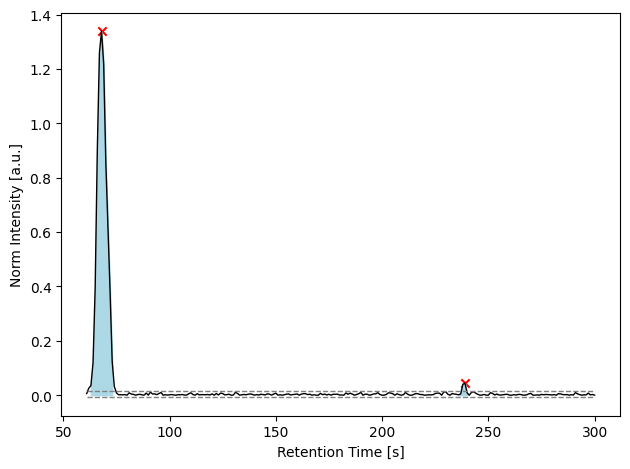

In [101]:
at=pd.read_csv("../output/output_concat.csv",index_col=0)
at.sort_values("RT",inplace=True)

aft=msu.peak_detection(
    df=at,
    baseline_convergence=0.02,
    rel_height=0.95,
    min_dist=10,
    datacolumn_name="norm_intensity"
)

fig,ax=plt.subplots()
plots.plot_activity_chromatogram(
    figure=fig,
    axs=ax,
    spot_df=at,
    peak_df=aft,
    baseline_acceptance=0.02,
    ydata_name="norm_intensity"
)

aft

In [102]:
msu.activity_annotation_features(ft,aft)

ft

,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity,activity@68.0s,activity@239.0s
feature_id,,,,,,,,,,,
5560009668047479476,3,67.913730,150.768209,65.570604,75.793608,150.768082,151.102814,0.000340,2.713379e+07,7.175401,NaN
11220579582388986480,3,68.554974,155.440070,63.894474,84.818988,155.440002,155.774857,0.001606,1.322547e+08,7.175401,NaN
8043790543639588691,3,68.554974,160.112045,64.942854,84.818988,160.112000,160.780609,0.001843,1.461576e+08,7.175401,NaN
9245926153909614240,1,71.461980,176.091186,63.663474,119.799756,176.091110,177.095123,0.012137,1.057680e+09,7.175401,NaN
4574161180977210476,3,70.840860,194.761980,66.282102,83.933856,194.761856,195.433792,0.002736,2.159362e+08,7.175401,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3075155880010057078,1,70.253730,1045.545943,66.709224,75.793608,1045.543701,1046.552490,0.000393,2.505554e+07,7.175401,NaN
1563602439564246836,1,69.675978,1059.556607,67.352226,77.007360,1059.549438,1060.572266,0.000283,2.249286e+07,7.175401,NaN
5515900028498269627,1,69.675978,1163.538389,66.709224,78.451854,1163.534668,1165.548340,0.000978,5.331690e+07,7.175401,NaN


In [103]:
specs={spec.getRT():{"mz":spec.get_peaks()[0],"int":spec.get_peaks()[1]} for spec in exp if spec.getMSLevel()==1}

xics={}
ft["size"]=np.nan
for i in ft.index:
    
    intsum_list=[]
    rtlist=[]

    for rt,pk in specs.items():

        if rt >= ft.loc[i,"RTstart"] and rt <= ft.loc[i,"RTend"]:

            intsum_list.append(pk["int"][(ft.loc[i,"MZstart"]<=pk["mz"]) & (ft.loc[i,"MZend"]>=pk["mz"])].sum())
            rtlist.append(rt)

    ft.loc[i,"size"]=len(rtlist)
    xics[i]=pd.DataFrame({"rt":rtlist,"int":intsum_list})

ft["rate"]=ft["size"]/(ft["RTend"]-ft["RTstart"])
ft


,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity,activity@68.0s,activity@239.0s,size,rate
feature_id,,,,,,,,,,,,,
5560009668047479476,3,67.913730,150.768209,65.570604,75.793608,150.768082,151.102814,0.000340,2.713379e+07,7.175401,NaN,18.0,1.760735
11220579582388986480,3,68.554974,155.440070,63.894474,84.818988,155.440002,155.774857,0.001606,1.322547e+08,7.175401,NaN,34.0,1.624888
8043790543639588691,3,68.554974,160.112045,64.942854,84.818988,160.112000,160.780609,0.001843,1.461576e+08,7.175401,NaN,31.0,1.559659
9245926153909614240,1,71.461980,176.091186,63.663474,119.799756,176.091110,177.095123,0.012137,1.057680e+09,7.175401,NaN,75.0,1.336034
4574161180977210476,3,70.840860,194.761980,66.282102,83.933856,194.761856,195.433792,0.002736,2.159362e+08,7.175401,NaN,28.0,1.586245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075155880010057078,1,70.253730,1045.545943,66.709224,75.793608,1045.543701,1046.552490,0.000393,2.505554e+07,7.175401,NaN,16.0,1.761264
1563602439564246836,1,69.675978,1059.556607,67.352226,77.007360,1059.549438,1060.572266,0.000283,2.249286e+07,7.175401,NaN,17.0,1.760721
5515900028498269627,1,69.675978,1163.538389,66.709224,78.451854,1163.534668,1165.548340,0.000978,5.331690e+07,7.175401,NaN,20.0,1.703196


In [104]:
set_rate=ft.rate.mean()

test=aft.loc[7]
curr_len=len(at.loc[test["left_ips"]:test["right_ips"],"norm_intensity"])
curr_t=at.loc[test["right_ips"],"RT"]-at.loc[test["left_ips"],"RT"]
curr_rate=curr_len/curr_t

set_len=int(set_rate*curr_t)

interpRT=np.linspace(at.loc[test["right_ips"],"RT"],at.loc[test["left_ips"],"RT"],set_len)

interpInt=np.interp(interpRT,at.loc[test["left_ips"]:test["right_ips"],"RT"],at.loc[test["left_ips"]:test["right_ips"],"norm_intensity"])
interpAP=pd.DataFrame({"RT":interpRT,"Int":interpInt})


In [105]:
interpAP["norm_int"]=interpAP.Int/interpAP.Int.max()

for i,df in xics.items():
    ftpeak=df.int/df.int.max()
    distance=ts_dtw(interpAP.norm_int,ftpeak)
    ft.loc[i,"dist"]=distance

ft

,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity,activity@68.0s,activity@239.0s,size,rate,dist
feature_id,,,,,,,,,,,,,,
5560009668047479476,3,67.913730,150.768209,65.570604,75.793608,150.768082,151.102814,0.000340,2.713379e+07,7.175401,NaN,18.0,1.760735,0.375113
11220579582388986480,3,68.554974,155.440070,63.894474,84.818988,155.440002,155.774857,0.001606,1.322547e+08,7.175401,NaN,34.0,1.624888,0.352928
8043790543639588691,3,68.554974,160.112045,64.942854,84.818988,160.112000,160.780609,0.001843,1.461576e+08,7.175401,NaN,31.0,1.559659,0.326216
9245926153909614240,1,71.461980,176.091186,63.663474,119.799756,176.091110,177.095123,0.012137,1.057680e+09,7.175401,NaN,75.0,1.336034,0.353822
4574161180977210476,3,70.840860,194.761980,66.282102,83.933856,194.761856,195.433792,0.002736,2.159362e+08,7.175401,NaN,28.0,1.586245,0.224668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075155880010057078,1,70.253730,1045.545943,66.709224,75.793608,1045.543701,1046.552490,0.000393,2.505554e+07,7.175401,NaN,16.0,1.761264,0.280047
1563602439564246836,1,69.675978,1059.556607,67.352226,77.007360,1059.549438,1060.572266,0.000283,2.249286e+07,7.175401,NaN,17.0,1.760721,0.396205
5515900028498269627,1,69.675978,1163.538389,66.709224,78.451854,1163.534668,1165.548340,0.000978,5.331690e+07,7.175401,NaN,20.0,1.703196,0.390456


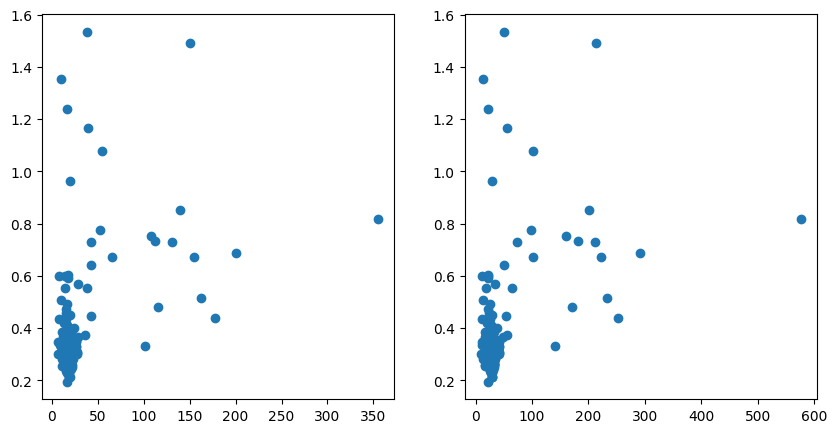

In [92]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(ft.RTend-ft.RTstart,ft.dist)
ax[1].scatter(ft["size"],ft.dist)


/tmp/ipykernel_42851/2149294244.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots()


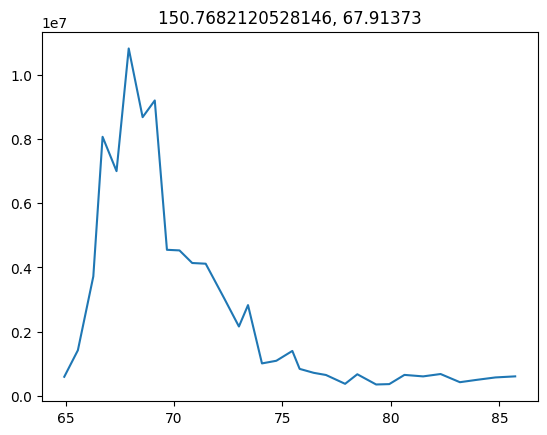

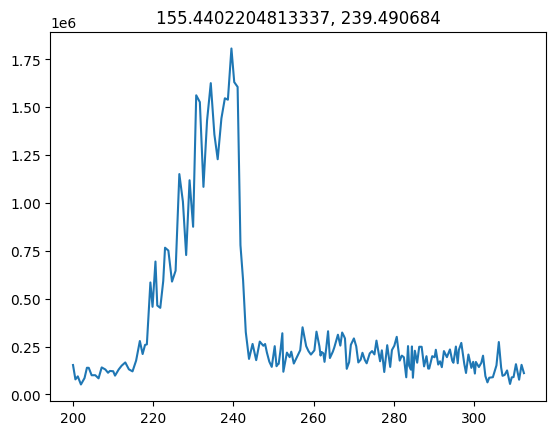

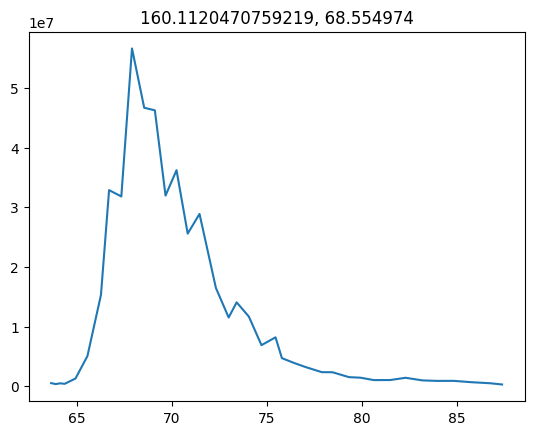

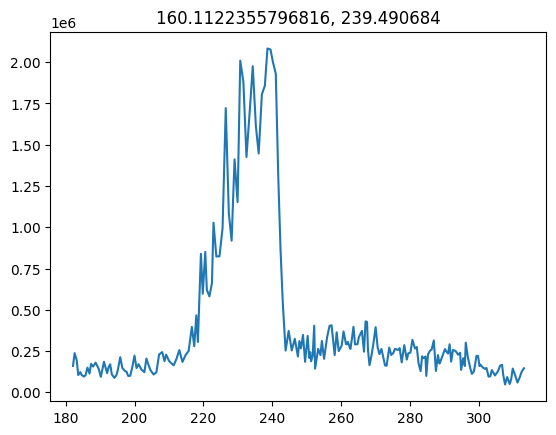

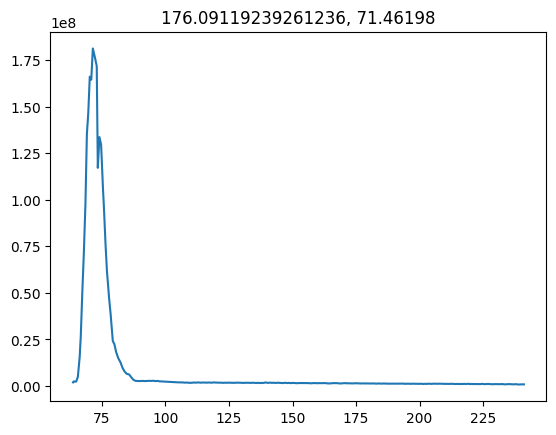

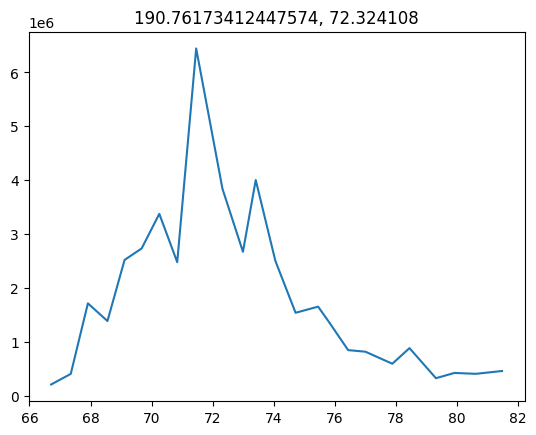

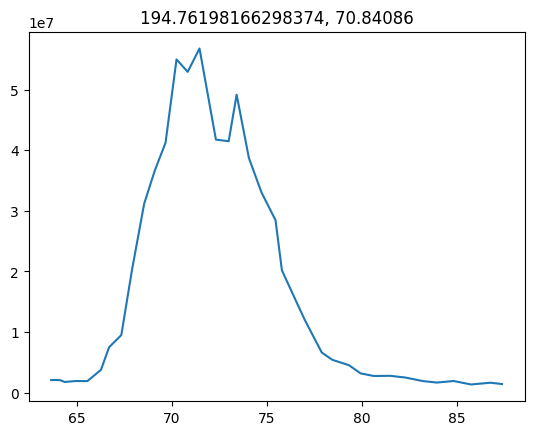

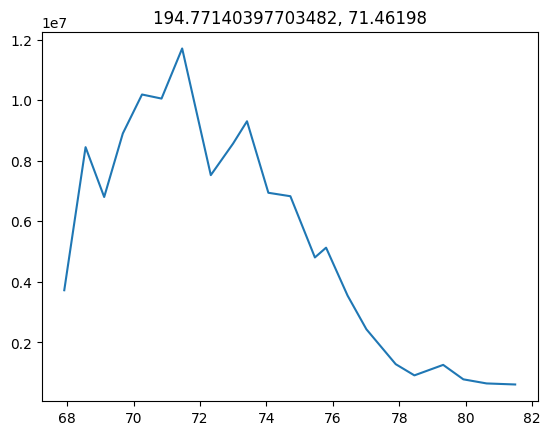

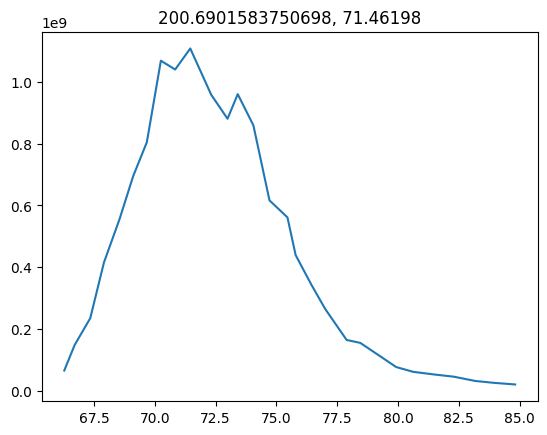

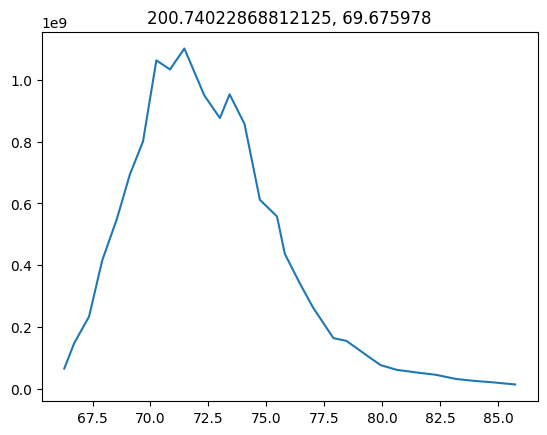

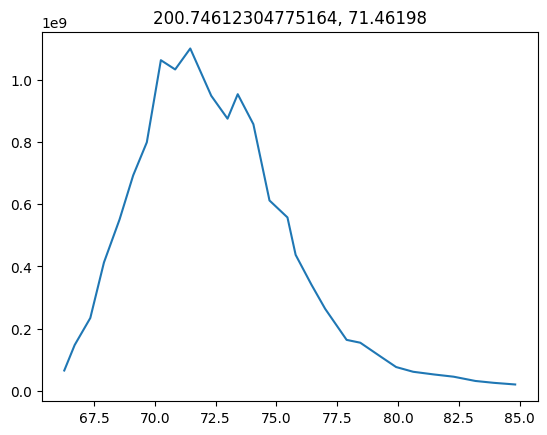

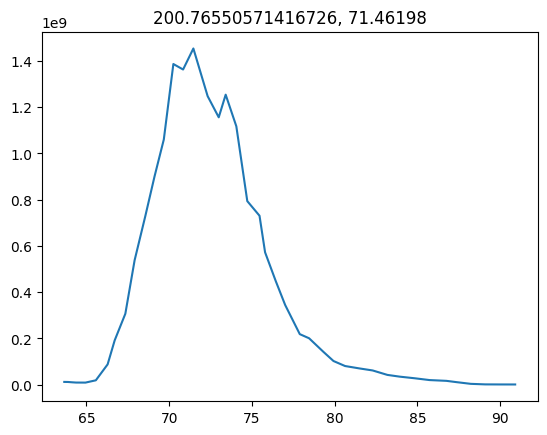

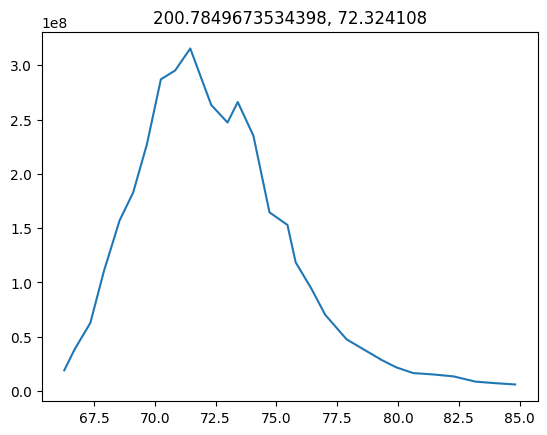

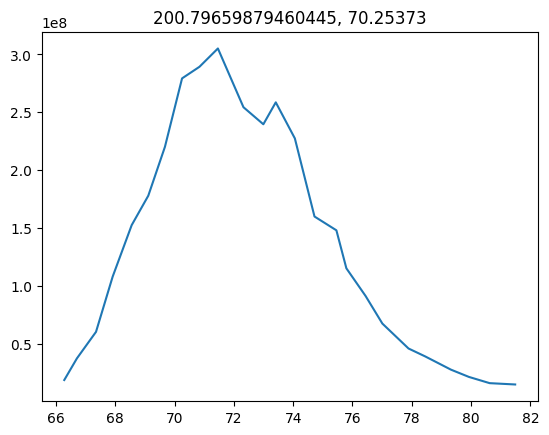

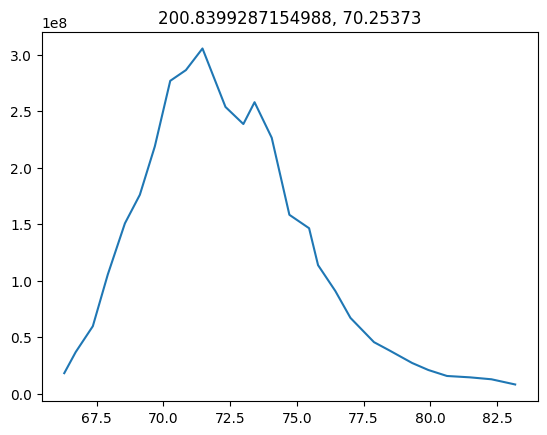

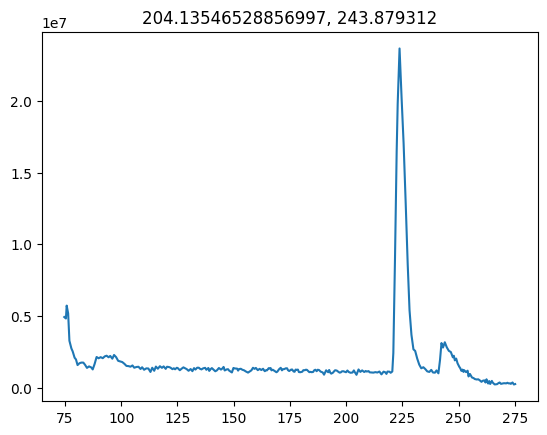

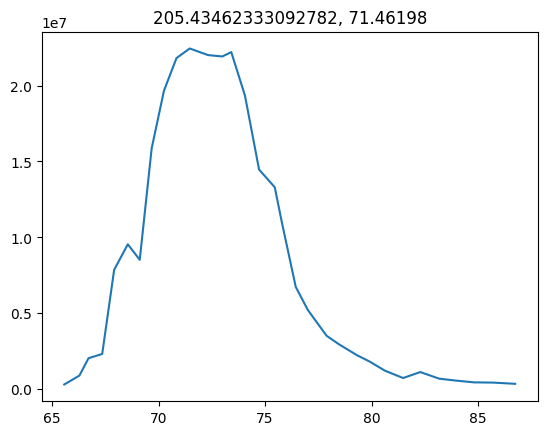

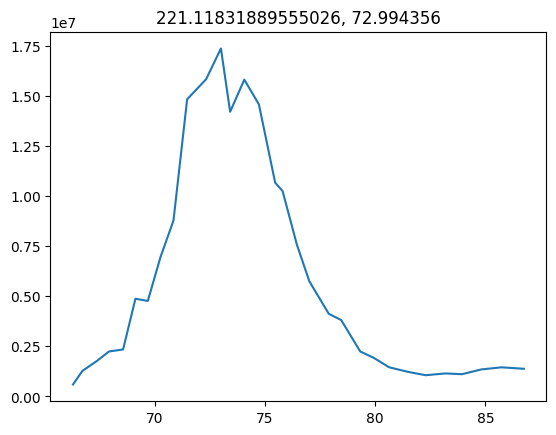

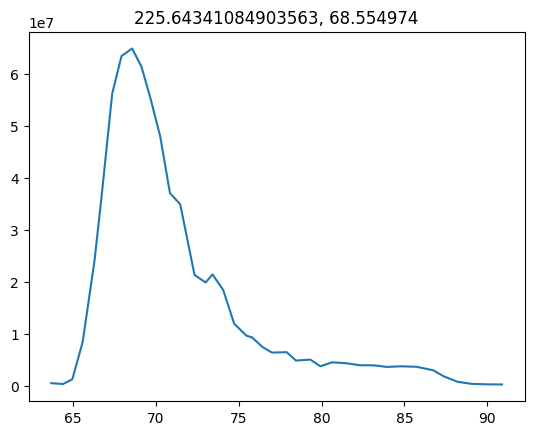

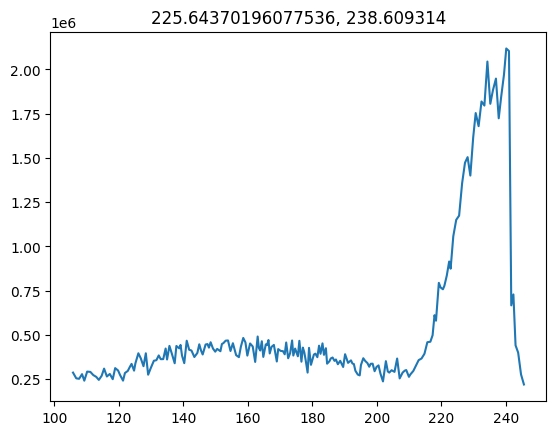

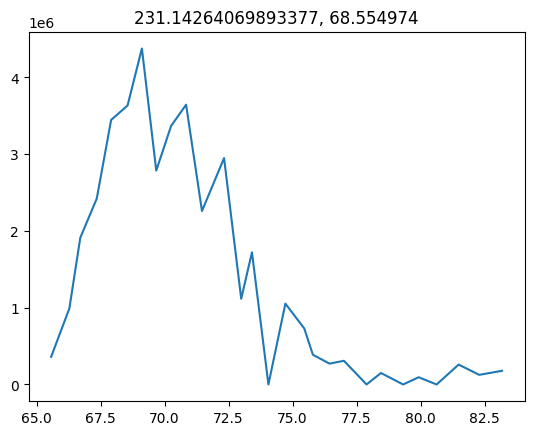

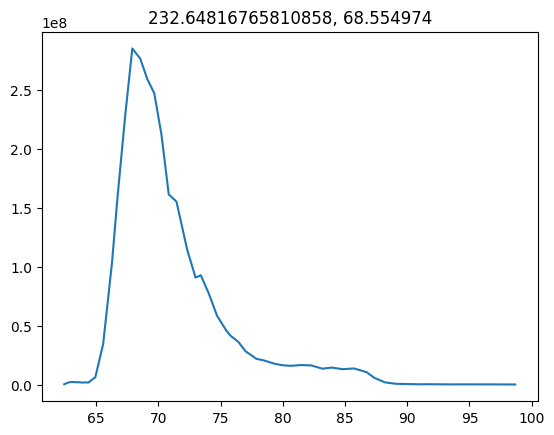

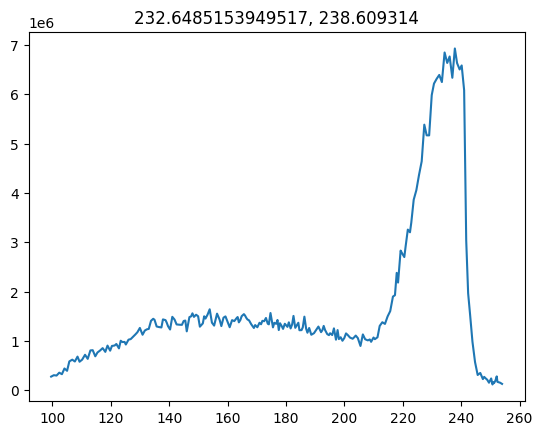

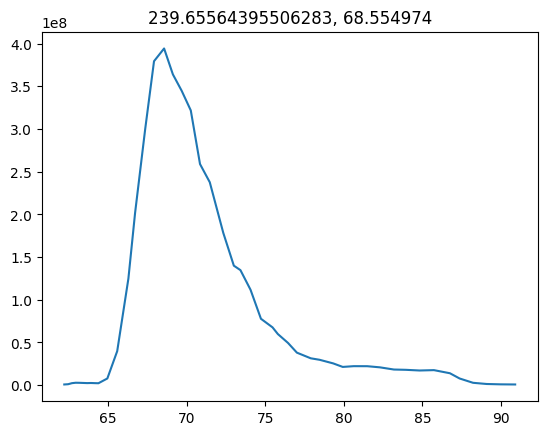

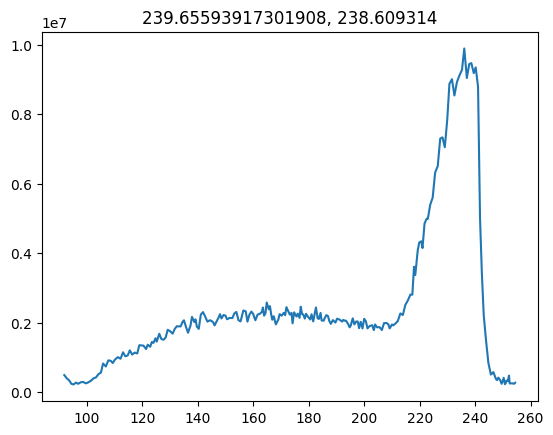

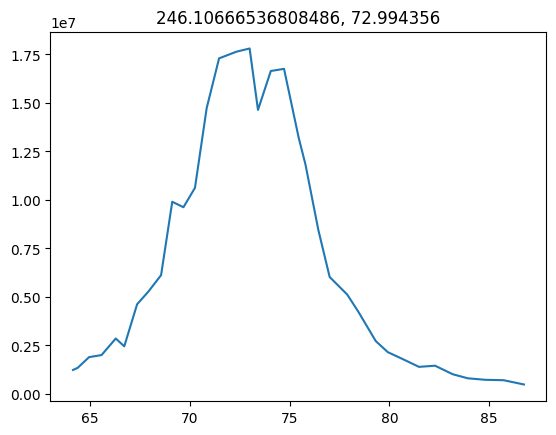

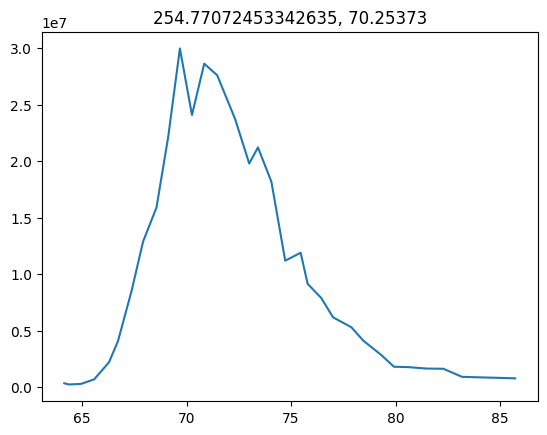

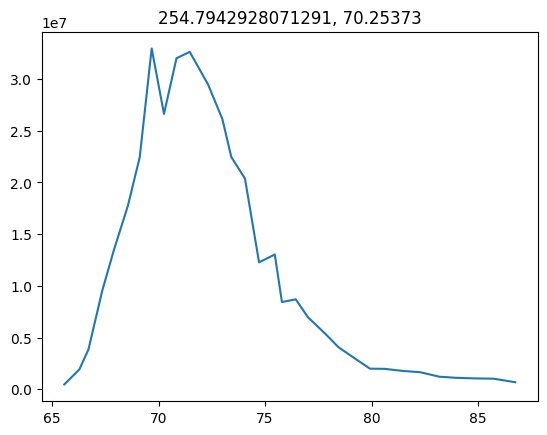

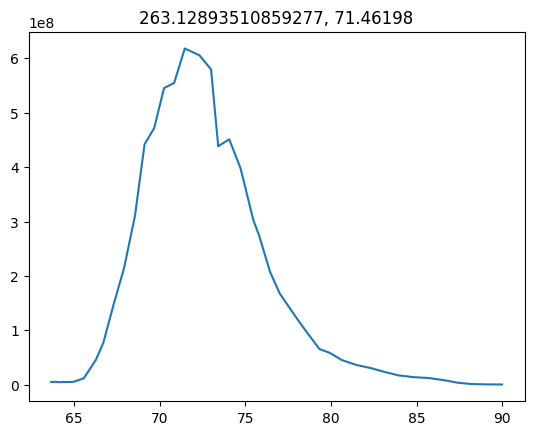

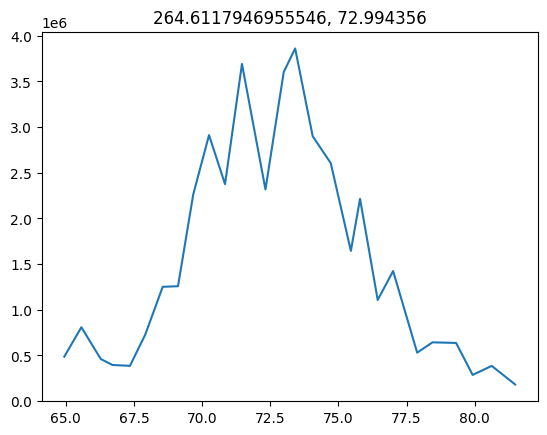

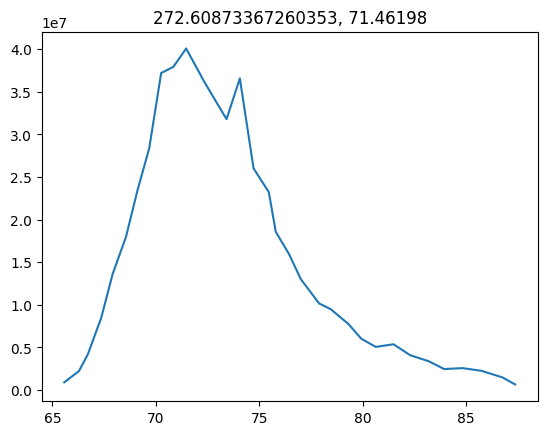

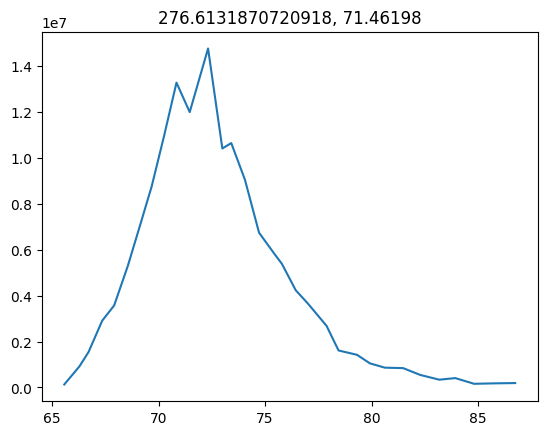

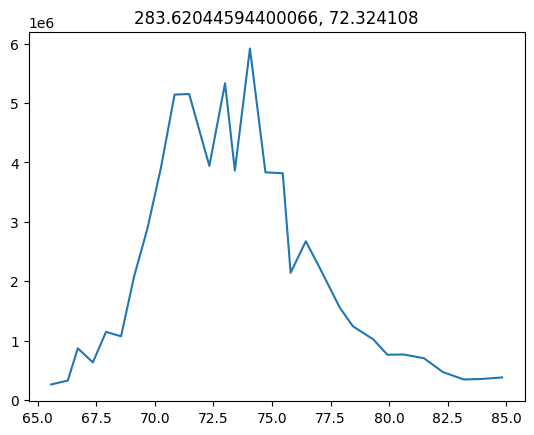

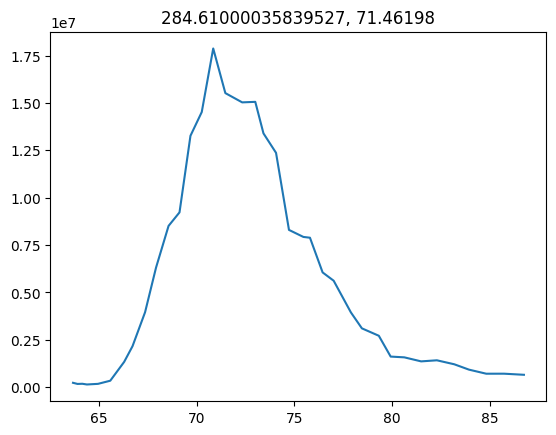

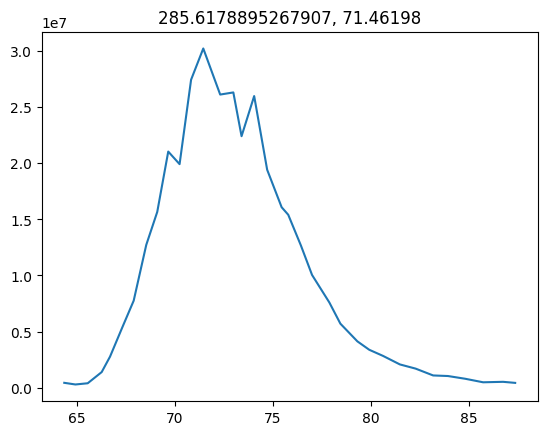

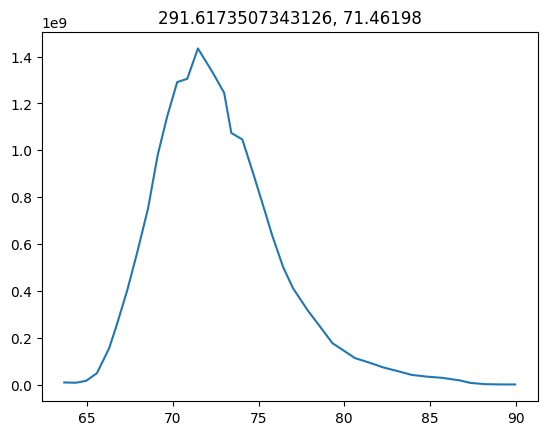

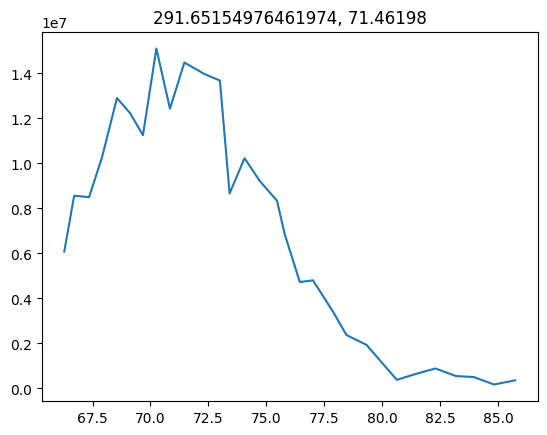

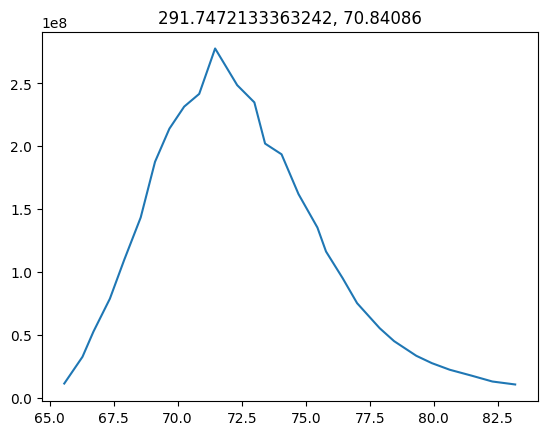

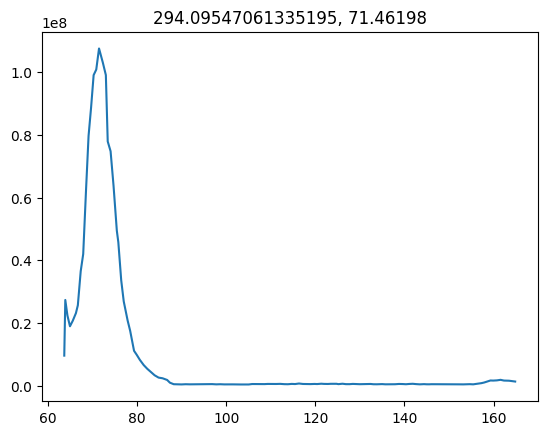

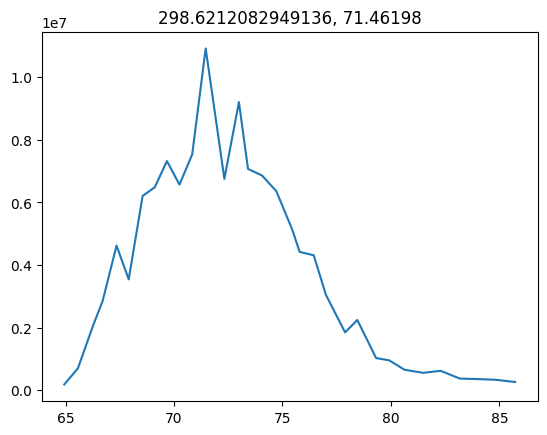

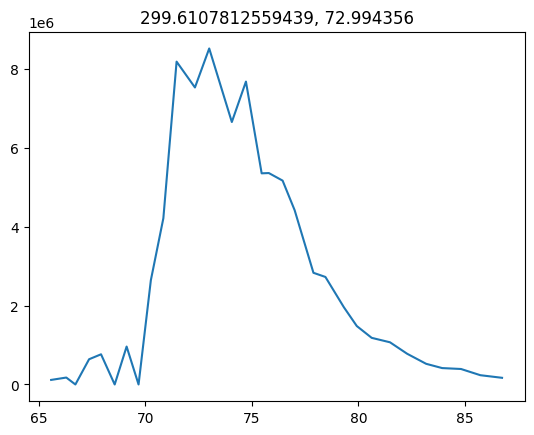

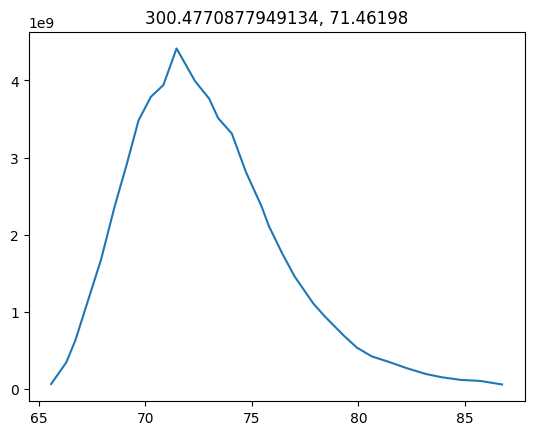

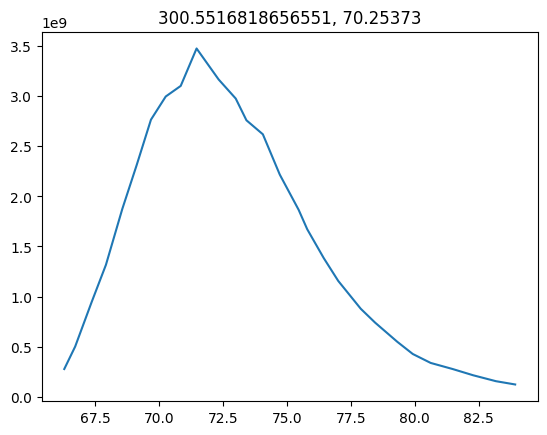

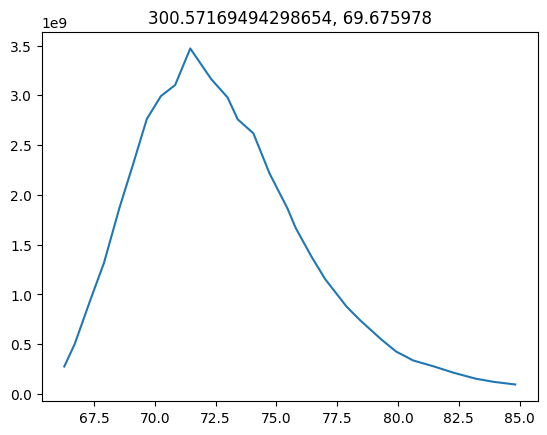

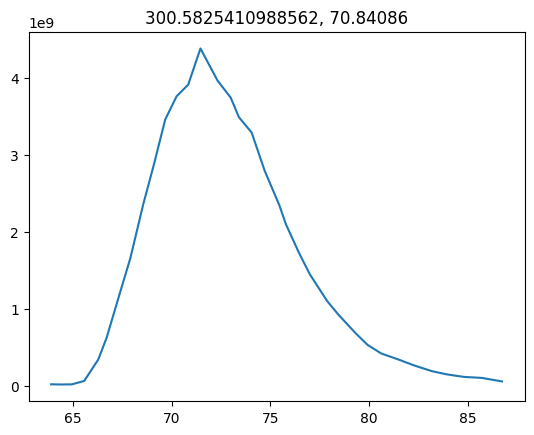

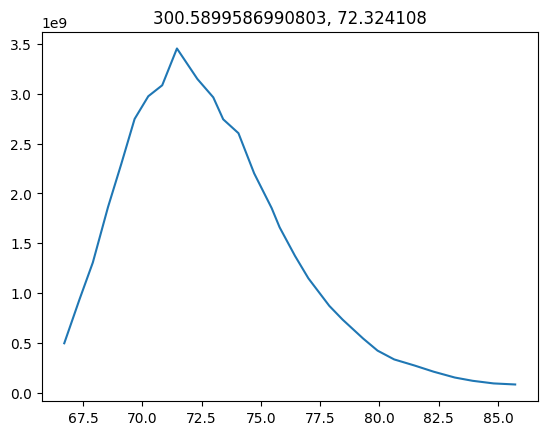

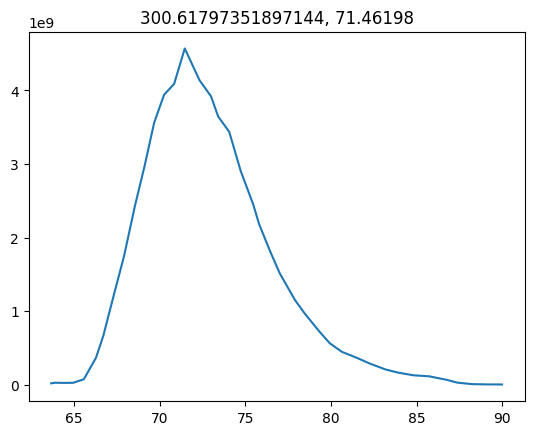

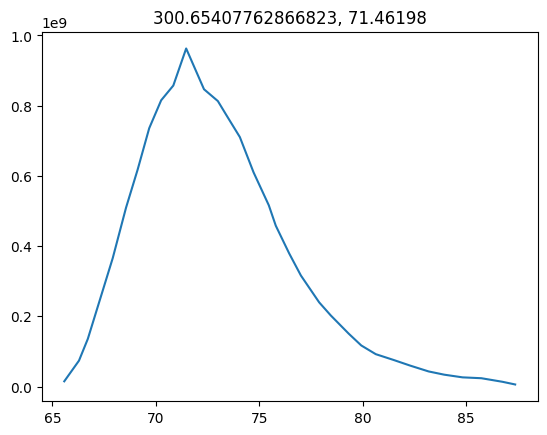

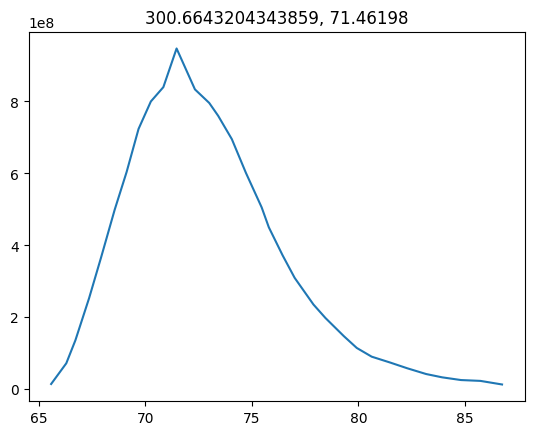

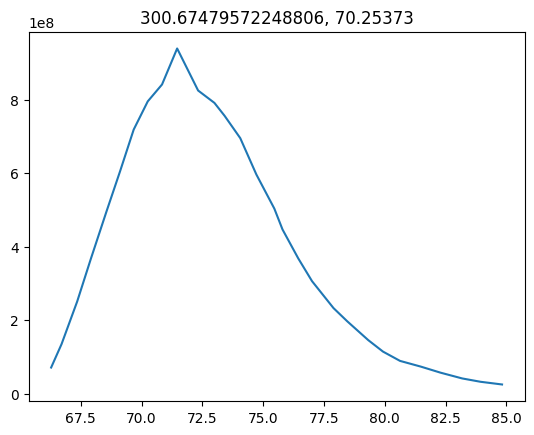

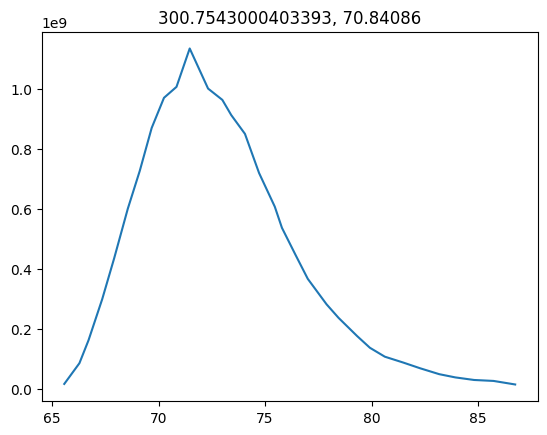

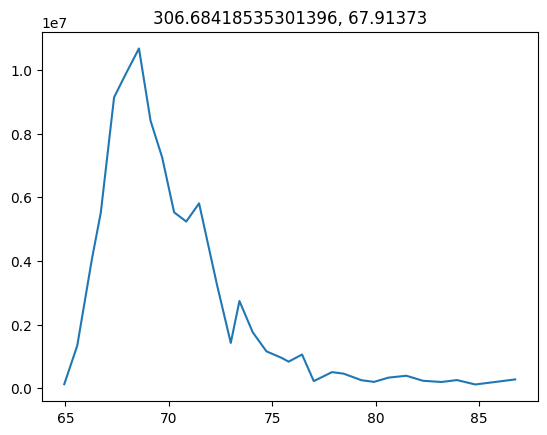

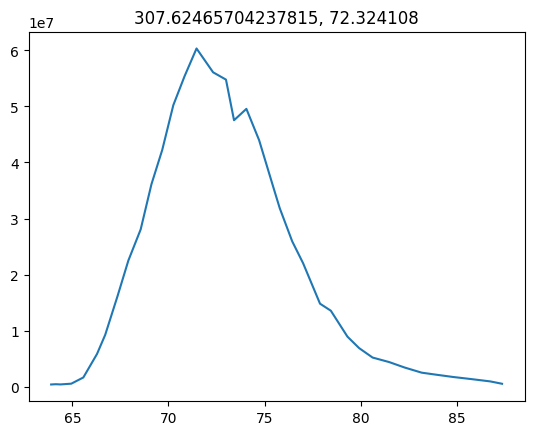

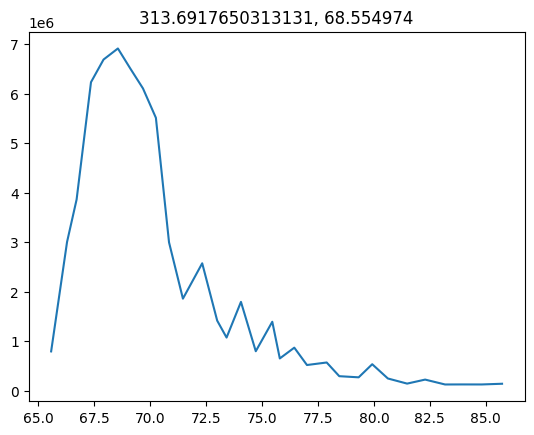

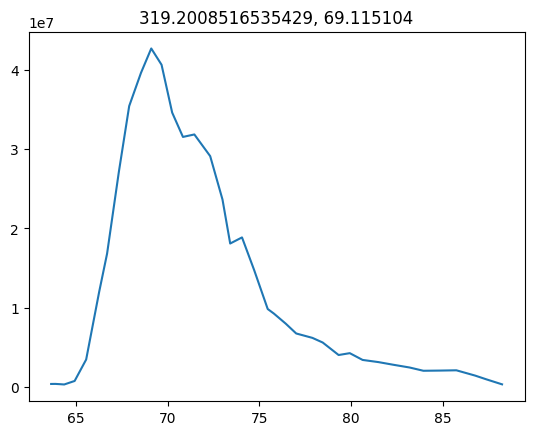

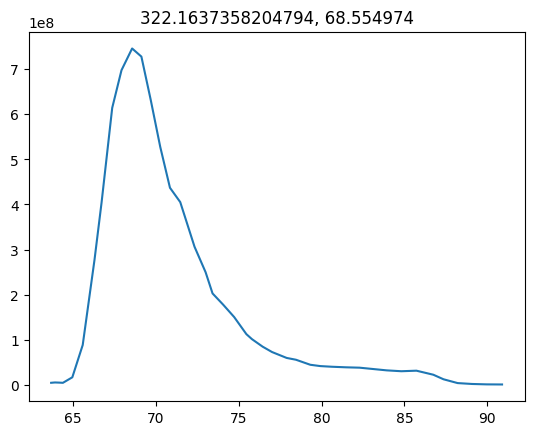

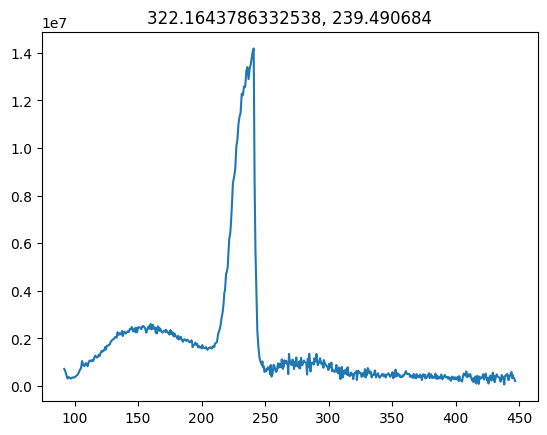

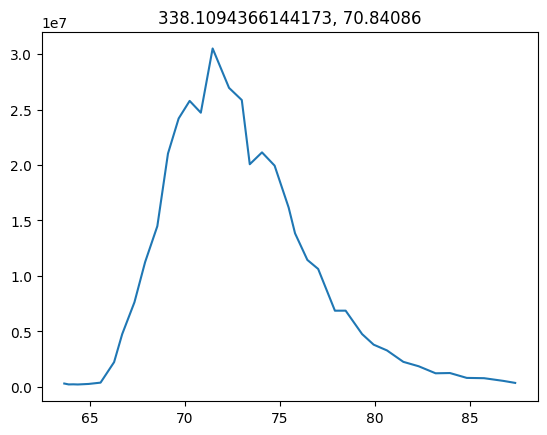

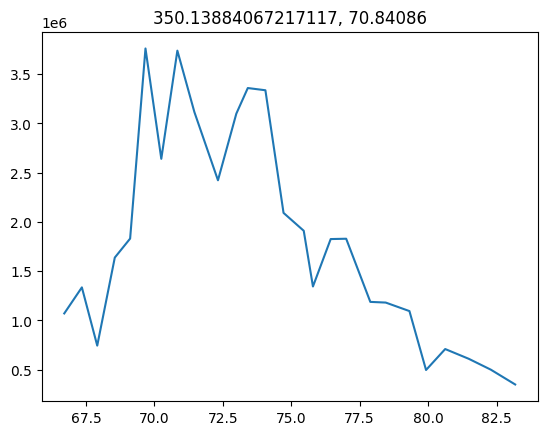

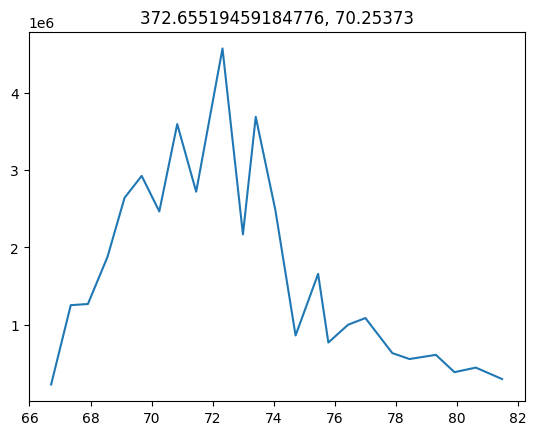

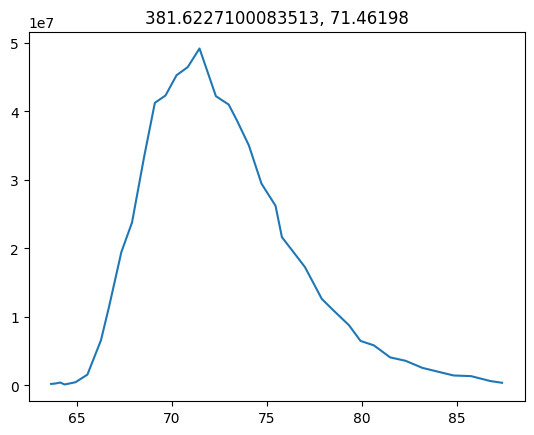

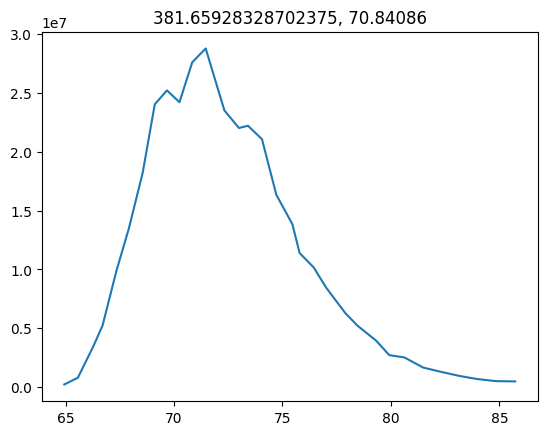

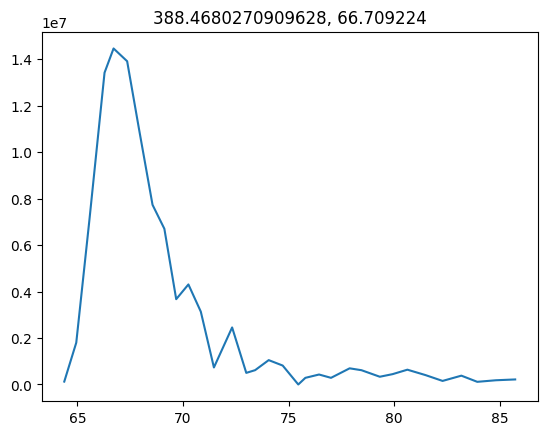

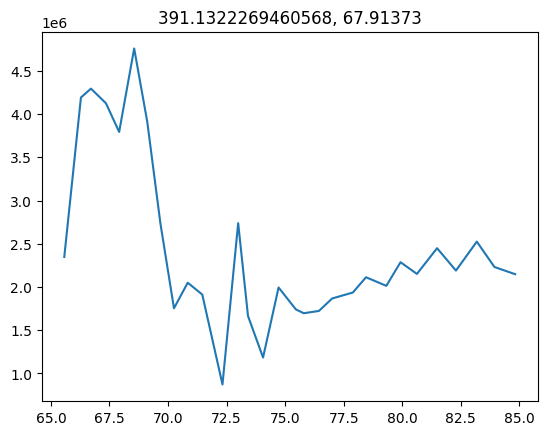

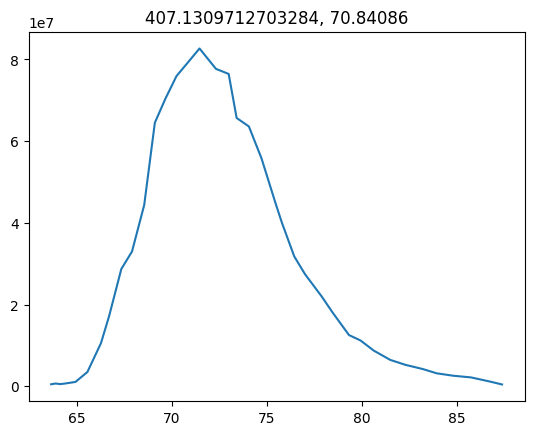

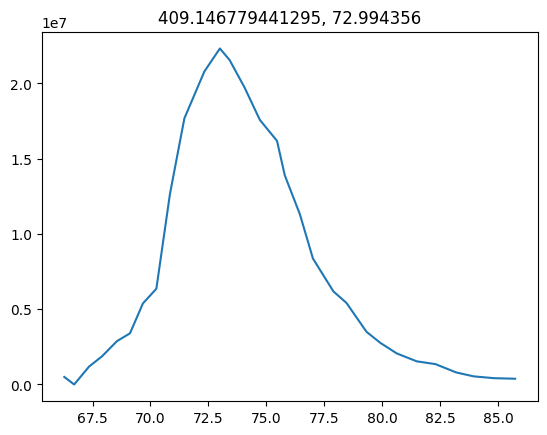

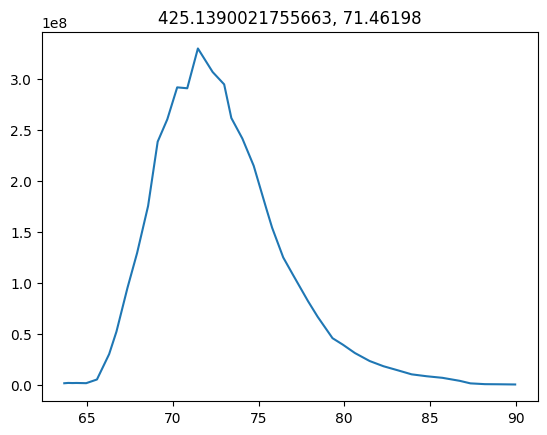

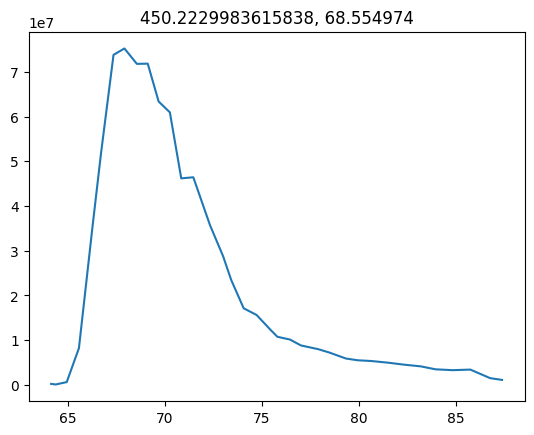

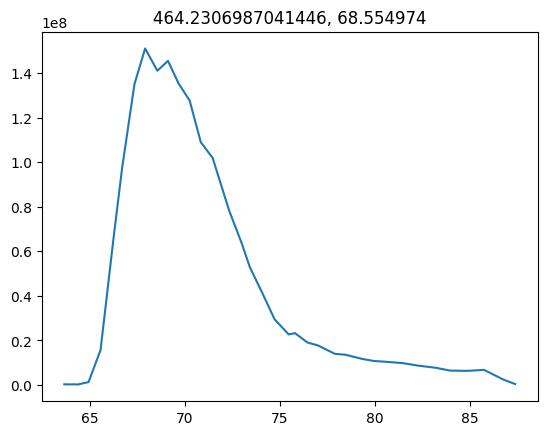

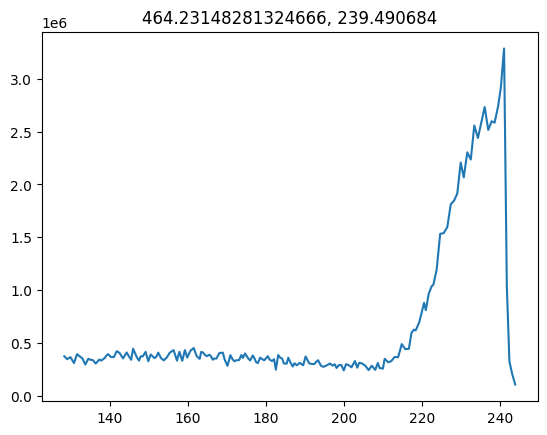

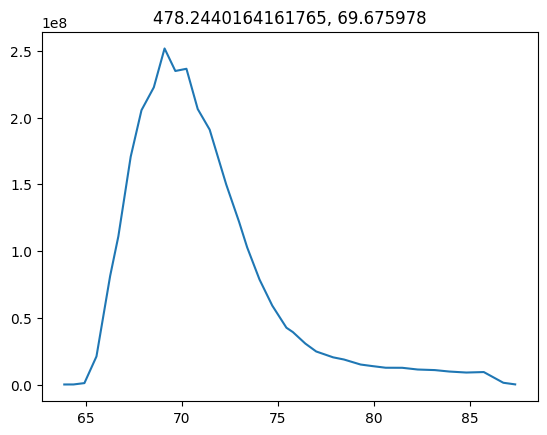

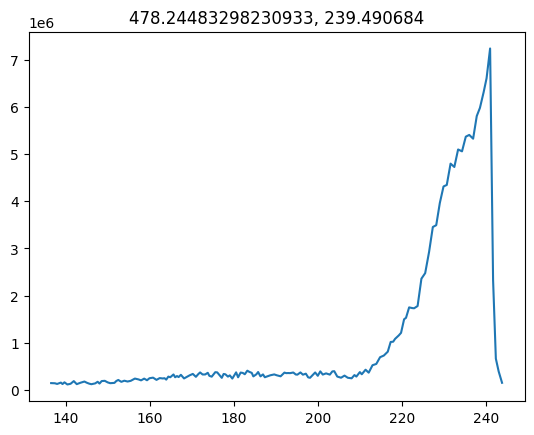

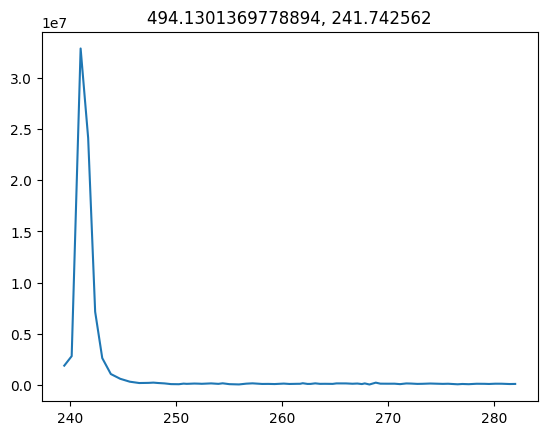

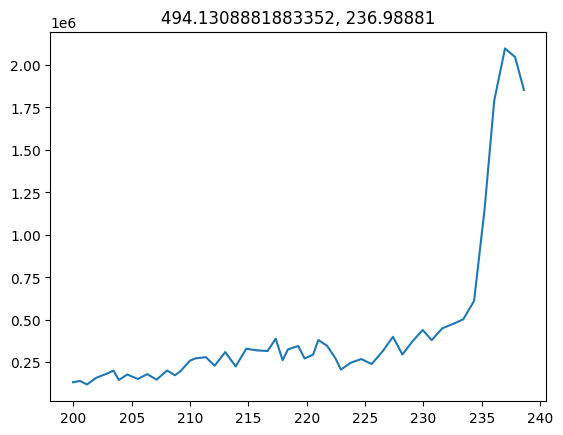

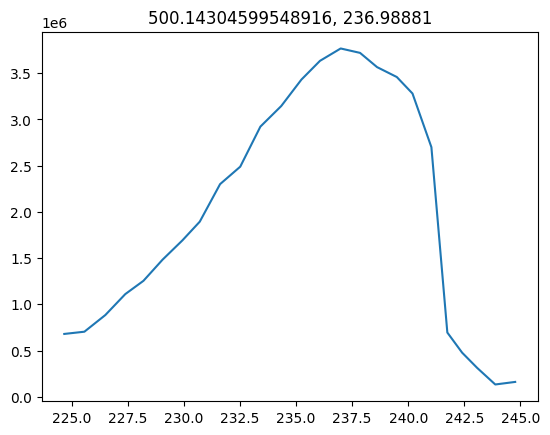

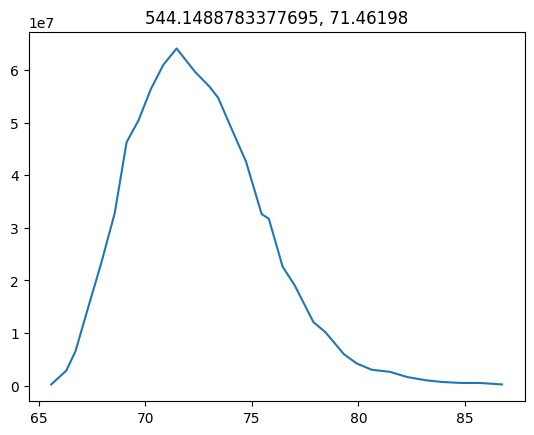

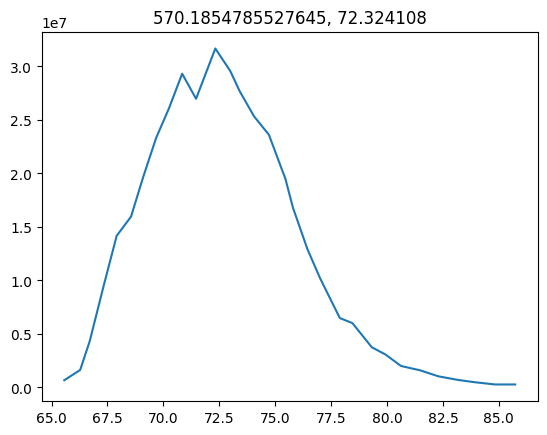

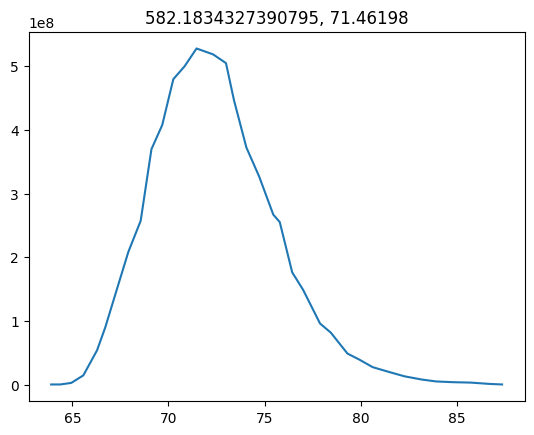

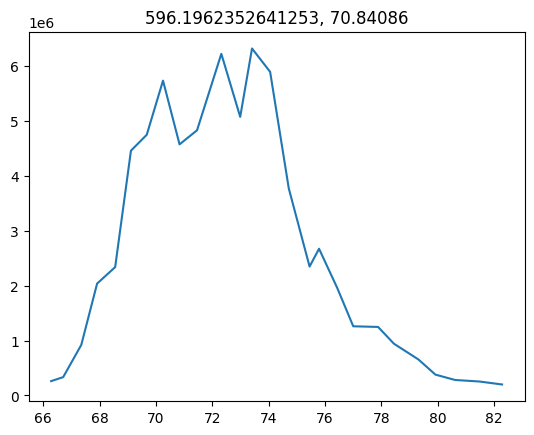

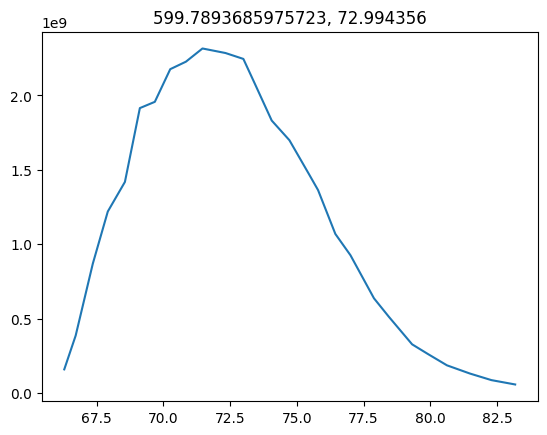

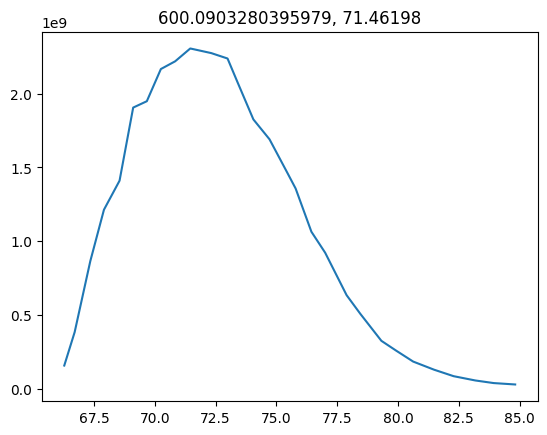

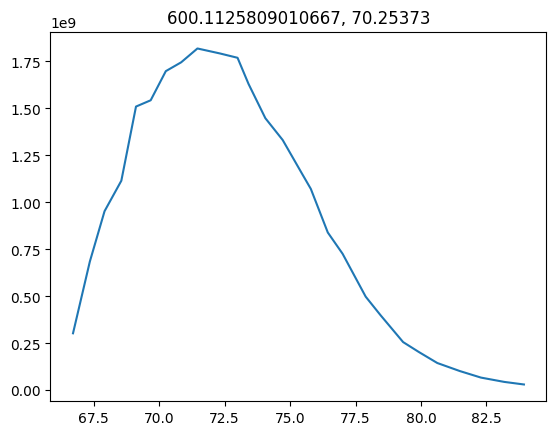

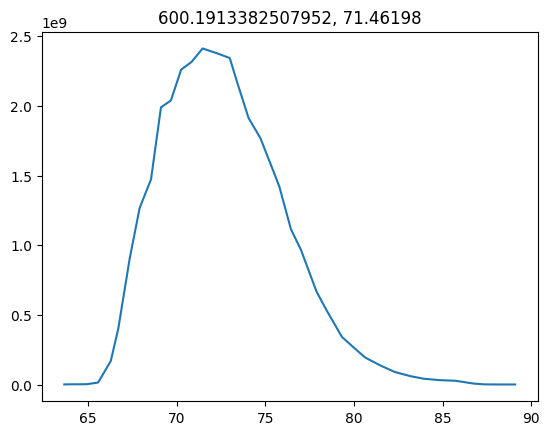

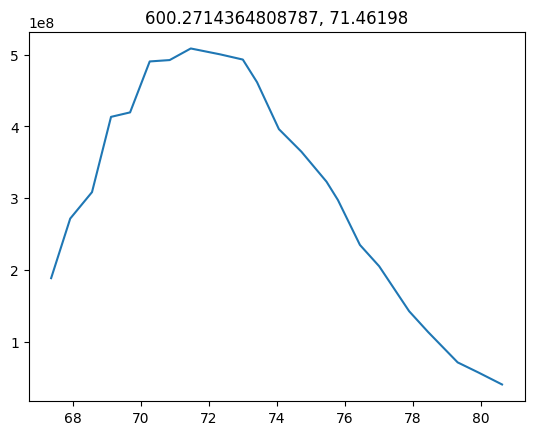

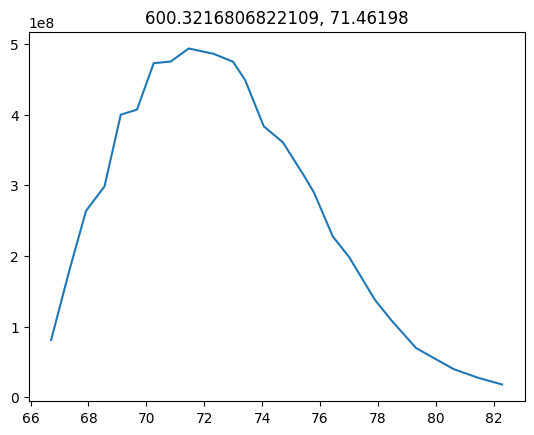

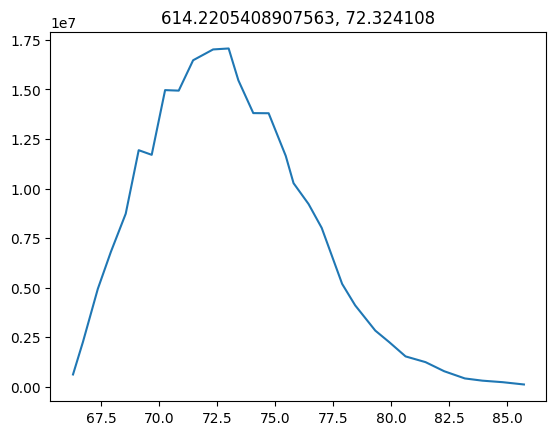

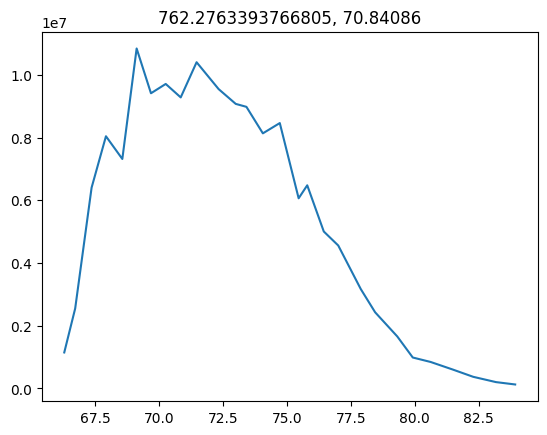

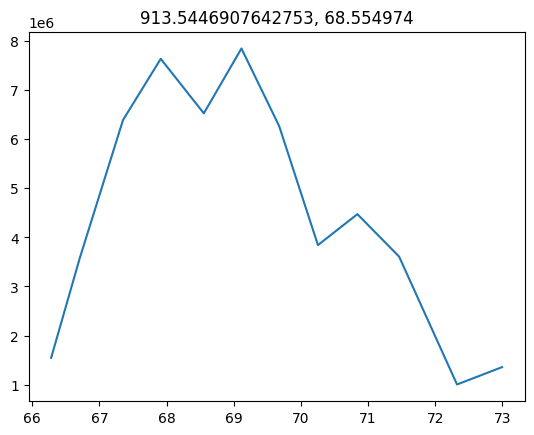

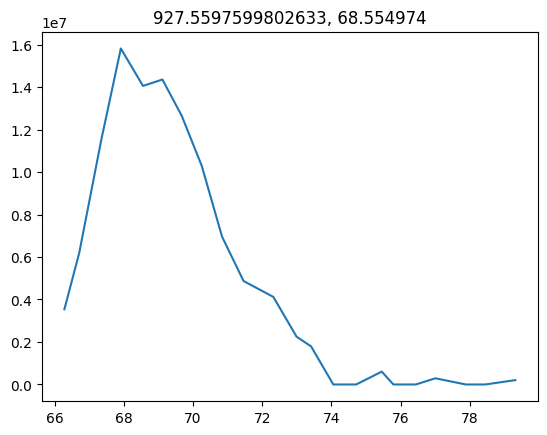

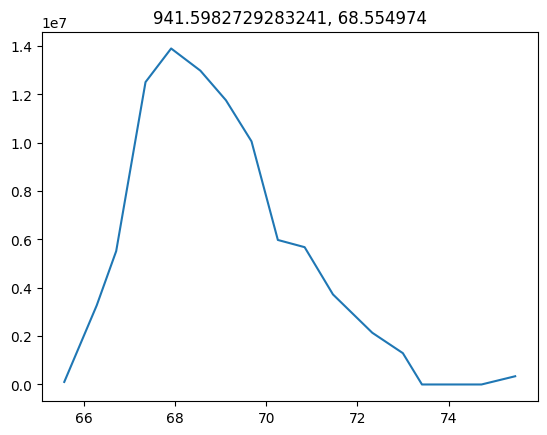

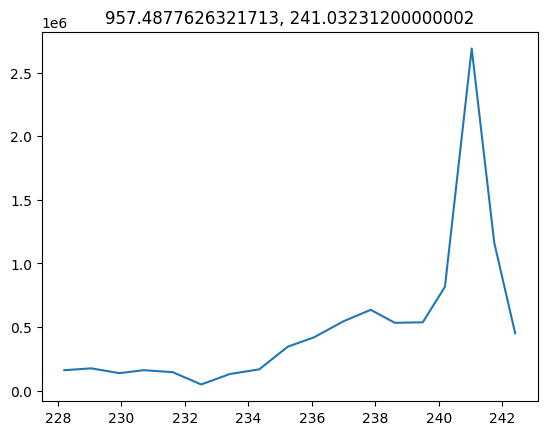

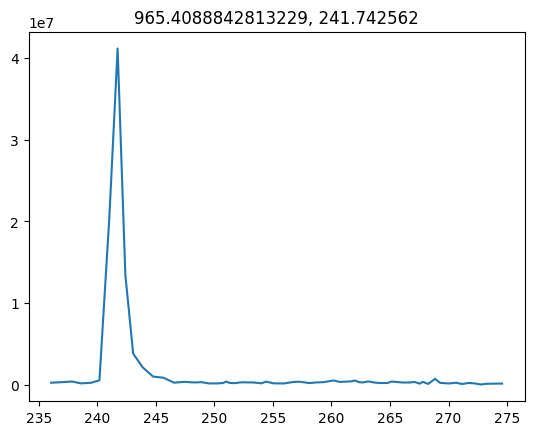

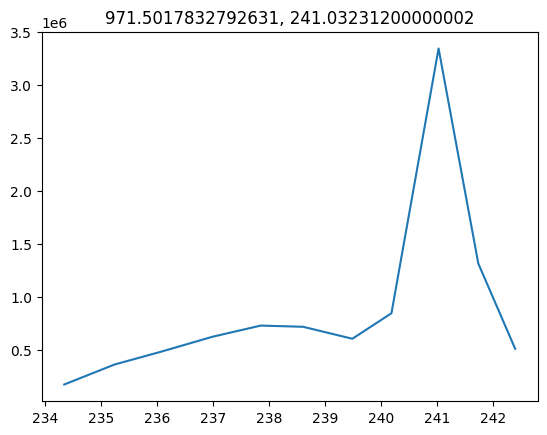

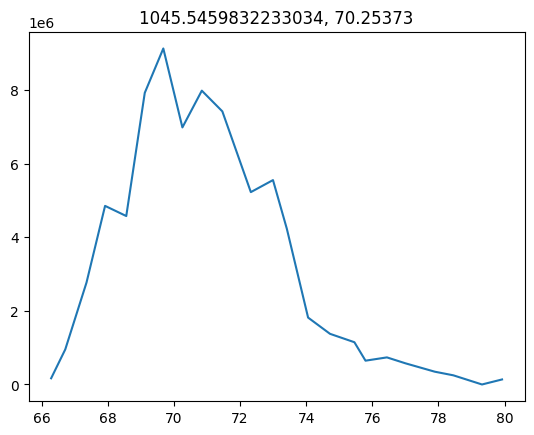

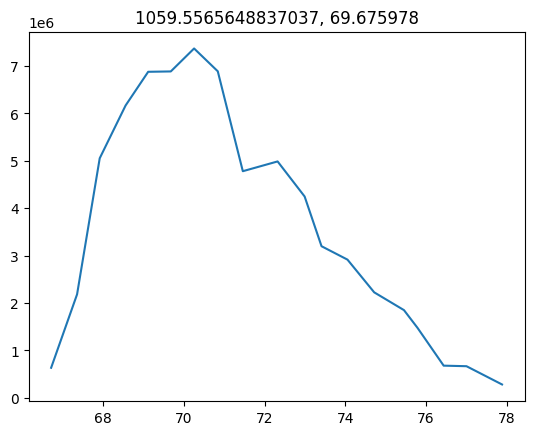

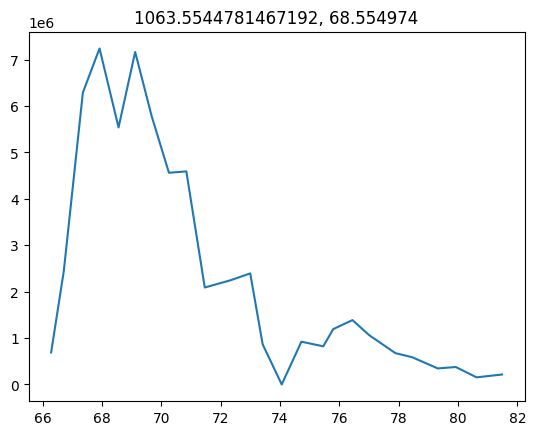

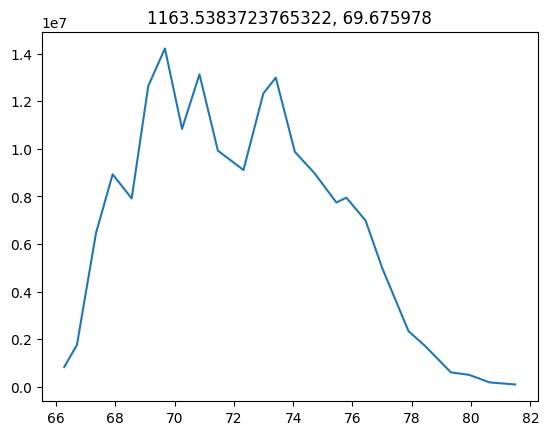

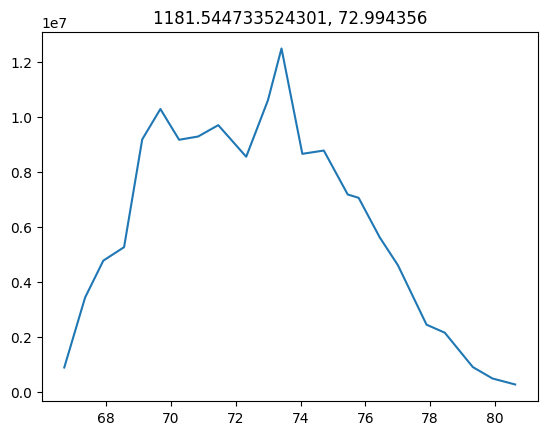

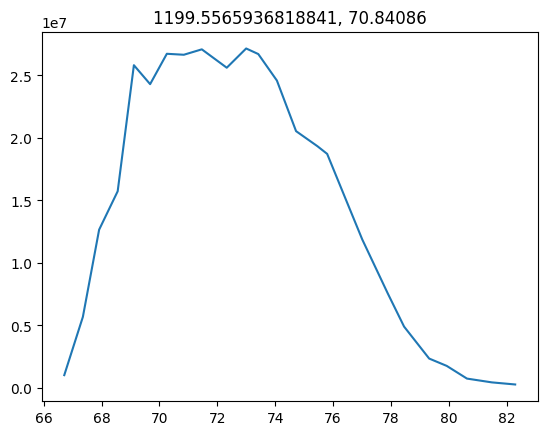

In [14]:
for i,df in xics.items():
    fig,ax=plt.subplots()
    ax.plot(df.rt,df.int)
    ax.set(title=f"{ft.loc[i,'mz']}, {ft.loc[i,'RT']}")


In [ ]:

# for i in ft.loc[(ft["activity@68.0s"]>0)|(ft["activity@239.0s"])].index:
#     for spec
    
    # intsum_list=[]
    # rtlist=[]
    # for spec in exp:
    #     if spec.getMSLevel()==1:           
    #         mzval,i=spec.get_peaks()
    #         intsum=i[(mzval>mz-1) & (mzval<mz+1)].sum()
    #         rtlist.append(spec.getRT())
    #         intsum_list.append(intsum)

    # fig,ax=plt.subplots()
    # ax.plot(rtlist,intsum_list)
    # ax.set(title=f"mz:{mz}, RT:")
    
    # ax2=ax.twinx()
    # plots.plot_activity_chromatogram(
    #     figure=fig,
    #     axs=ax,
    #     spot_df=at,
    #     peak_df=aft,
    #     baseline_acceptance=0.02,
    #     ydata_name="norm_intensity"
    # )